# EDA


- **Author**: Dan O'Connor
- **Notebook**: 3 of 9

This notebook will perform some basic EDA on the dataset. I will first show how some of the features are distributed across genres, then perform TSNE (dimensionality reduction technique) to visualize the data per genre in 2-D.

Import required libraries.

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Read in the filtered dataframe (from notebook 2)

In [5]:
filtered_model_df = pd.read_csv('Data/filtered_model_df.csv')

In [6]:
filtered_model_df.head()

,genre_top,chroma_cens_kurtosis_1,chroma_cens_kurtosis_2,chroma_cens_kurtosis_3,chroma_cens_kurtosis_4,chroma_cens_kurtosis_5,chroma_cens_kurtosis_6,chroma_cens_kurtosis_7,chroma_cens_kurtosis_8,chroma_cens_kurtosis_9,...,tonnetz_std_4,tonnetz_std_5,tonnetz_std_6,zcr_kurtosis_1,zcr_max_1,zcr_mean_1,zcr_median_1,zcr_min_1,zcr_skew_1,zcr_std_1
0,Hip-Hop,7.180,5.2300,0.249,1.350,1.480,0.5310,1.480,2.690,0.867,...,0.0541,0.0122,0.0121,5.76,0.459,0.0856,0.0713,0.0,2.09,0.0614
1,Hip-Hop,1.890,0.7610,0.345,2.300,1.650,0.0676,1.370,1.050,0.108,...,0.0638,0.0142,0.0177,2.82,0.466,0.0846,0.0640,0.0,1.72,0.0693
2,Hip-Hop,0.528,-0.0777,-0.280,0.686,1.940,0.8810,-0.923,-0.927,0.667,...,0.0407,0.0127,0.0148,6.81,0.375,0.0531,0.0415,0.0,2.19,0.0449
3,Pop,3.700,-0.2910,2.200,-0.234,1.370,0.9980,1.770,1.600,0.521,...,0.0744,0.0180,0.0139,21.40,0.452,0.0775,0.0718,0.0,3.54,0.0408
4,Hip-Hop,0.918,0.6740,0.578,1.280,0.934,0.0782,1.200,-0.175,0.925,...,0.0588,0.0163,0.0158,4.73,0.419,0.0644,0.0508,0.0,1.81,0.0546


Here I am grouping the dataframe by genre. This will be useful at viewing how features vary per genre.

In [11]:
grouped_df = filtered_model_df.groupby('genre_top').agg(list) #put the features in a list.

In [13]:
grouped_df.head(2)

,chroma_cens_kurtosis_1,chroma_cens_kurtosis_2,chroma_cens_kurtosis_3,chroma_cens_kurtosis_4,chroma_cens_kurtosis_5,chroma_cens_kurtosis_6,chroma_cens_kurtosis_7,chroma_cens_kurtosis_8,chroma_cens_kurtosis_9,chroma_cens_kurtosis_10,...,tonnetz_std_4,tonnetz_std_5,tonnetz_std_6,zcr_kurtosis_1,zcr_max_1,zcr_mean_1,zcr_median_1,zcr_min_1,zcr_skew_1,zcr_std_1
genre_top,,,,,,,,,,,,,,,,,,,,,
Classical,"[-0.467, 0.0523, -0.895, -0.995, -0.323, -0.55...","[-0.692, -0.524, -0.631, -0.83, -0.688, -0.082...","[-0.886, -0.341, -1.02, 0.523, -1.04, -1.14, -...","[0.0419, -0.253, -0.482, -0.857, -0.577, -0.78...","[-0.0212, -0.124, -0.735, -1.05, -0.839, -0.54...","[-0.493, -1.04, -0.976, -0.873, -0.886, -0.817...","[-0.708, -0.141, -0.263, -0.692, -0.545, -0.77...","[-0.702, -0.687, -0.563, -1.04, -1.2, -0.491, ...","[-0.167, -1.01, -0.941, -0.692, -1.09, -0.539,...","[-0.863, -0.374, -1.03, -1.22, -0.934, -0.799,...",...,"[0.125, 0.171, 0.151, 0.162, 0.161, 0.158, 0.1...","[0.0329, 0.032, 0.0393, 0.0369, 0.0379, 0.036,...","[0.0321, 0.0279, 0.0294, 0.0313, 0.0297, 0.031...","[135.0, 161.0, 287.0, 108.0, 138.0, 245.0, 8.5...","[0.284, 0.345, 0.413, 0.424, 0.341, 0.386, 0.1...","[0.0244, 0.0189, 0.0254, 0.0265, 0.0245, 0.025...","[0.0229, 0.0176, 0.0239, 0.022, 0.0225, 0.0239...","[0.00244, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[7.47, 6.87, 14.2, 9.42, 10.6, 13.0, 1.95, 5.6...","[0.0105, 0.00982, 0.0156, 0.0246, 0.0183, 0.01..."
Electronic,"[0.356, -0.19, -0.296, 0.411, 1.34, 0.2, 0.103...","[0.315, -0.485, 0.397, -0.383, 0.399, -0.397, ...","[-0.551, -0.728, -0.31, 0.0916, -0.034, 0.138,...","[-1.01, 0.244, -0.506, -0.374, -0.145, -0.792,...","[-0.358, 0.31, -0.837, 0.147, -0.677, -0.723, ...","[1.25, -0.445, -0.307, 0.859, 0.306, -0.559, 0...","[0.184, -0.25, 0.752, -0.183, 0.115, -0.757, -...","[0.353, 0.41, 1.39, 0.38, 2.01, -0.817, 0.0406...","[-0.405, 0.653, 0.192, -0.815, -0.0126, -0.399...","[-0.171, 0.61, 1.24, -0.689, 0.371, 0.579, 0.4...",...,"[0.0959, 0.0929, 0.0888, 0.087, 0.103, 0.172, ...","[0.0182, 0.0172, 0.0188, 0.0211, 0.0202, 0.030...","[0.0232, 0.0189, 0.0193, 0.0261, 0.0293, 0.035...","[15.0, 22.7, 33.6, 17.4, 4.2, 17.7, 23.8, 37.8...","[0.394, 0.496, 0.466, 0.492, 0.271, 0.24, 0.48...","[0.0455, 0.0557, 0.0454, 0.0593, 0.0499, 0.020...","[0.0337, 0.042, 0.04, 0.0444, 0.042, 0.0137, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.00146, 0.0, 0.0, 0...","[3.13, 3.91, 3.7, 3.55, 1.97, 3.59, 3.67, 4.2,...","[0.039, 0.0504, 0.0301, 0.0589, 0.0375, 0.025,..."


Below I defined a `histogram_helper` which will plot histograms for each statistical feature, per genre. I have set it to display the statistical features as columns and each row as a genre. This allows for easily interpretting the large set of histograms output. For example looking at the first codeblock below with histograms at `zcr` , or zero crossing rate. We can view the distributions of `max` of the zcr across genres by looking at the second column. It is apparent this different genres have different distributions.

In [150]:
statistics = ['kurtosis','max','mean','median','min','skew','std'] #define the features

In [210]:
def histogram_helper(feat_name,num_feat=1):
    fig, axes = plt.subplots(9,7, figsize=(25,25)) #9x7 grid
    axes = axes.ravel() #flatten axes array
    for i in range(0,len(statistics)): #for each statistic
        for j, (genre, data) in enumerate(grouped_df.groupby('genre_top')): #for each genre per each statistic
            axes[i+j*7].hist(data[feat_name + '_' + statistics[i] + '_' + str(num_feat)], bins=20) #pull relevant data
            axes[i+j*7].set_title(genre.title() + ' ' + feat_name + ' ' + statistics[i].title()) #set the title appropriately
    plt.tight_layout() 
    plt.savefig(f'{feat_name}')
    plt.show()


For the zcr, it can be seen that certain statistical measures carry less variance, for example the kurtosis(1st col) and the minimum (5th col) distributions across all genres roughly follows the same distribution.

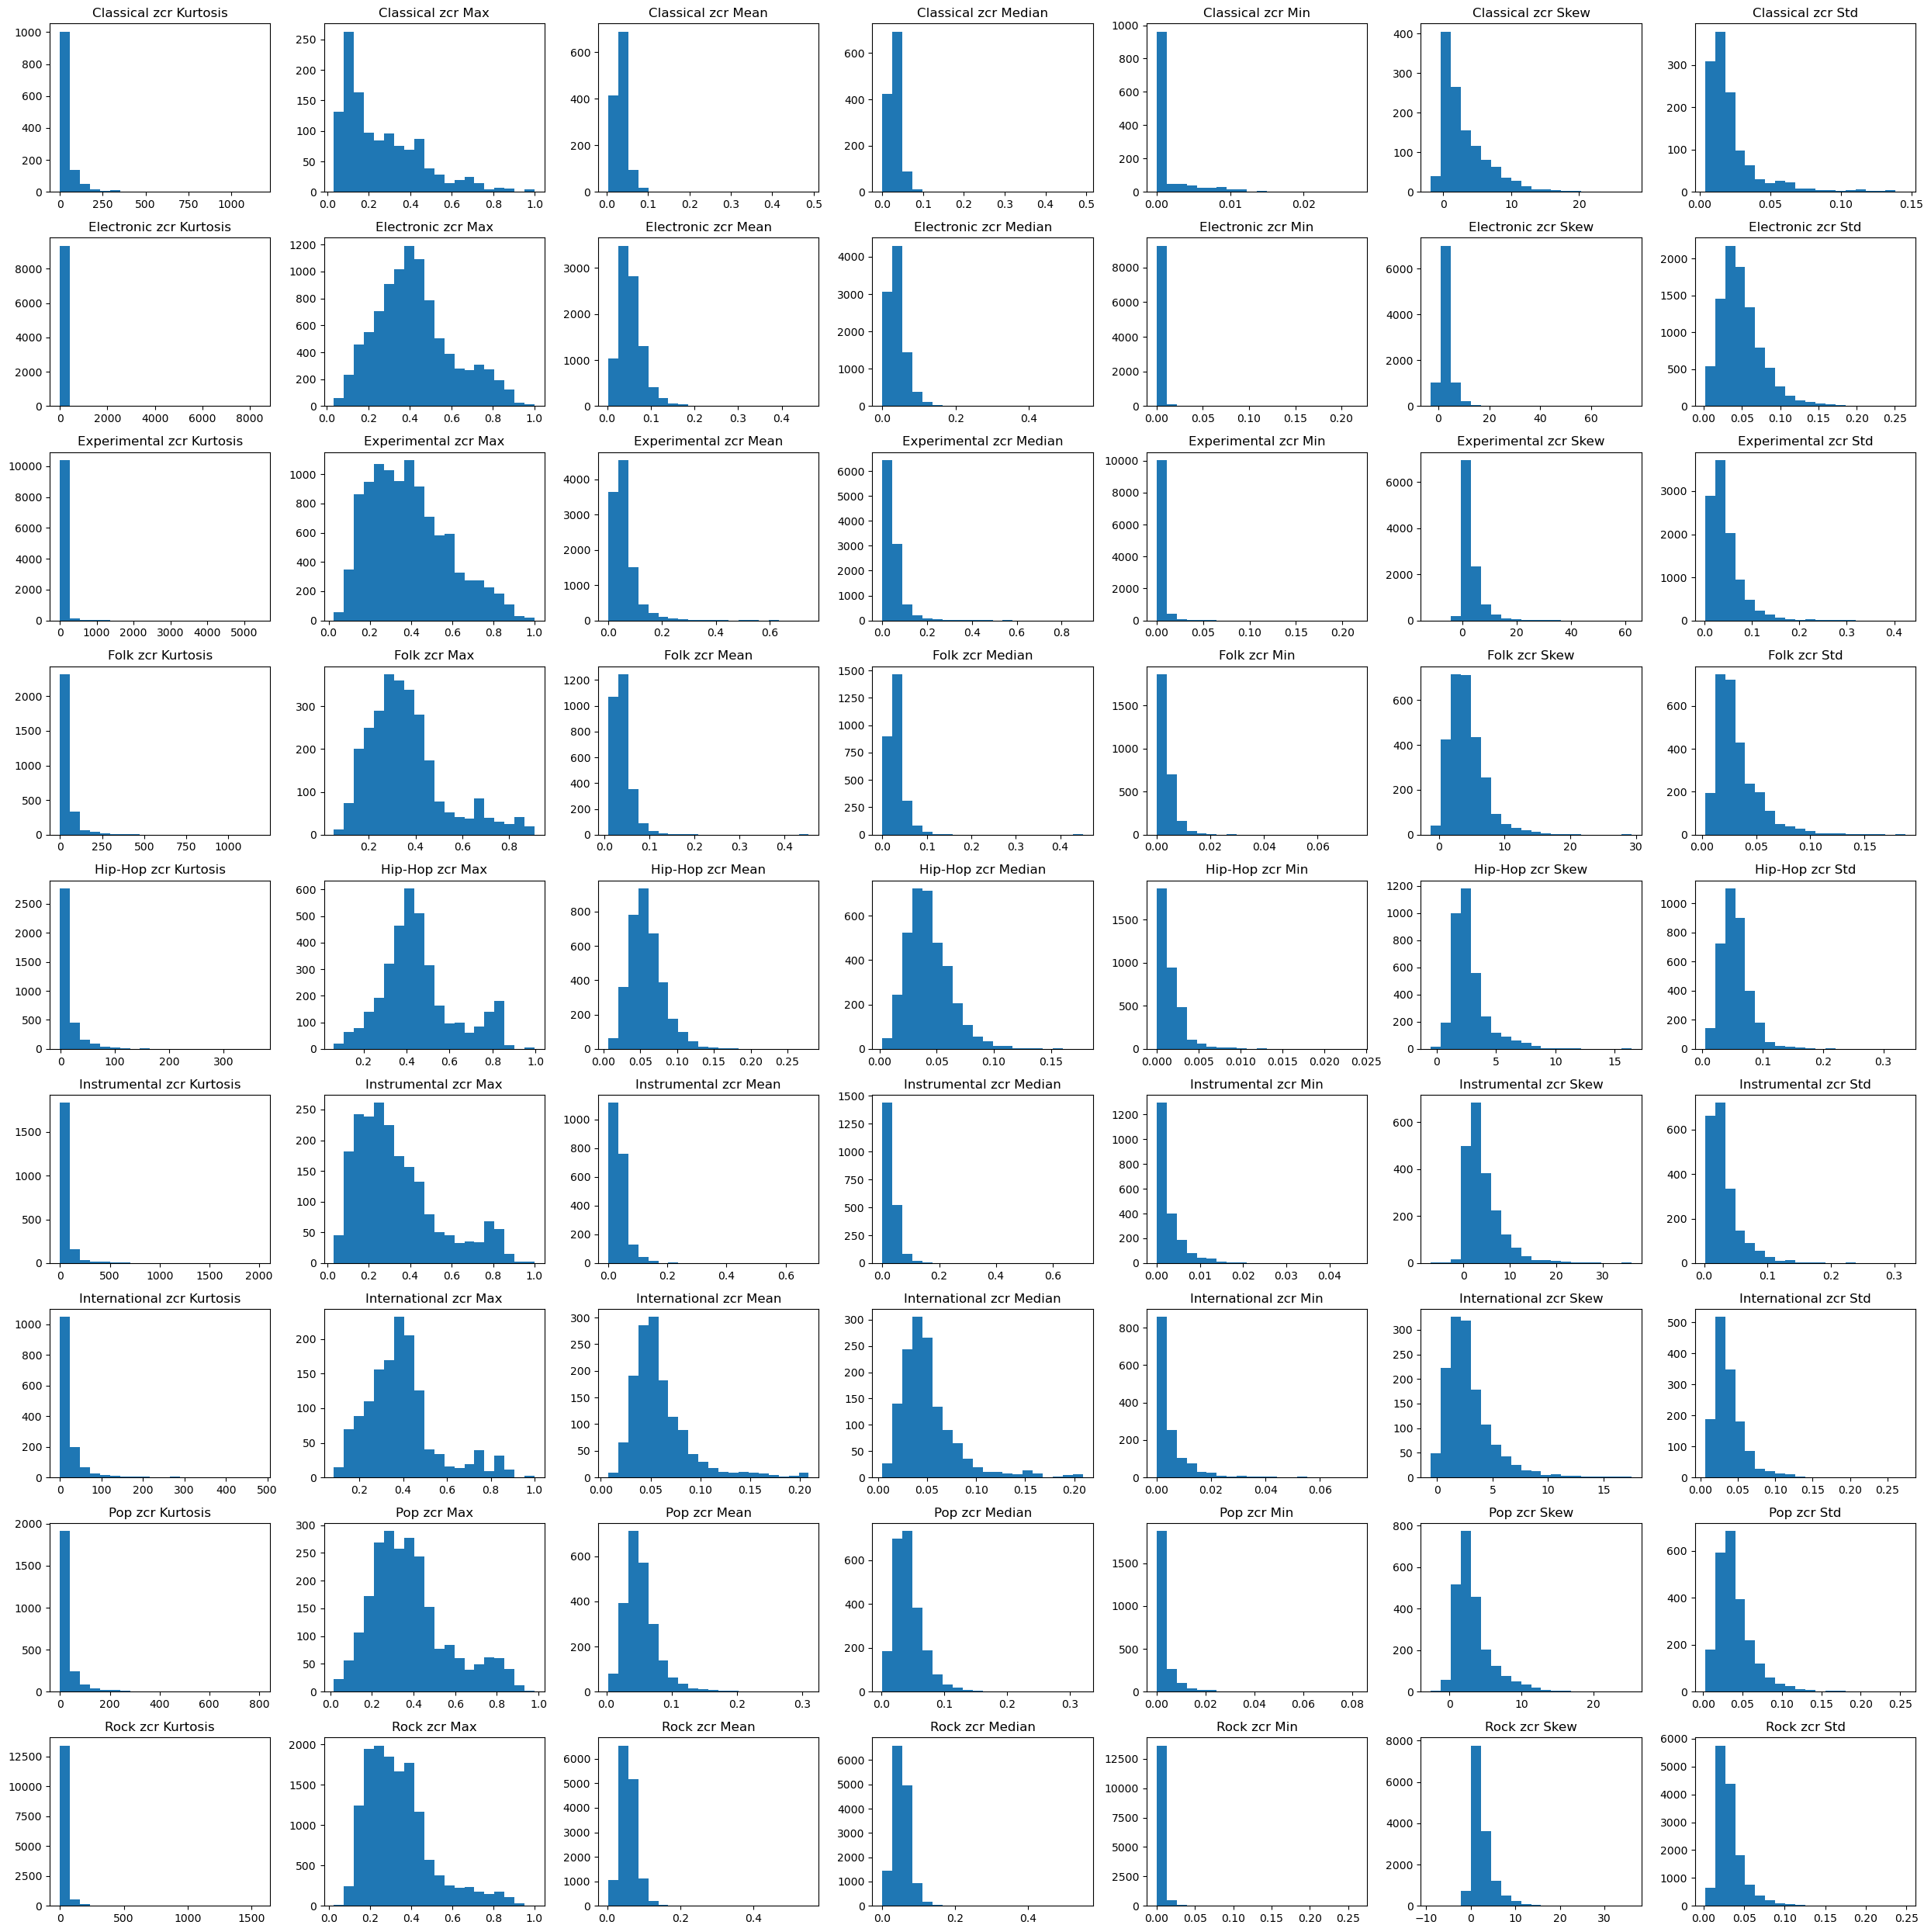

In [211]:
histogram_helper('zcr')

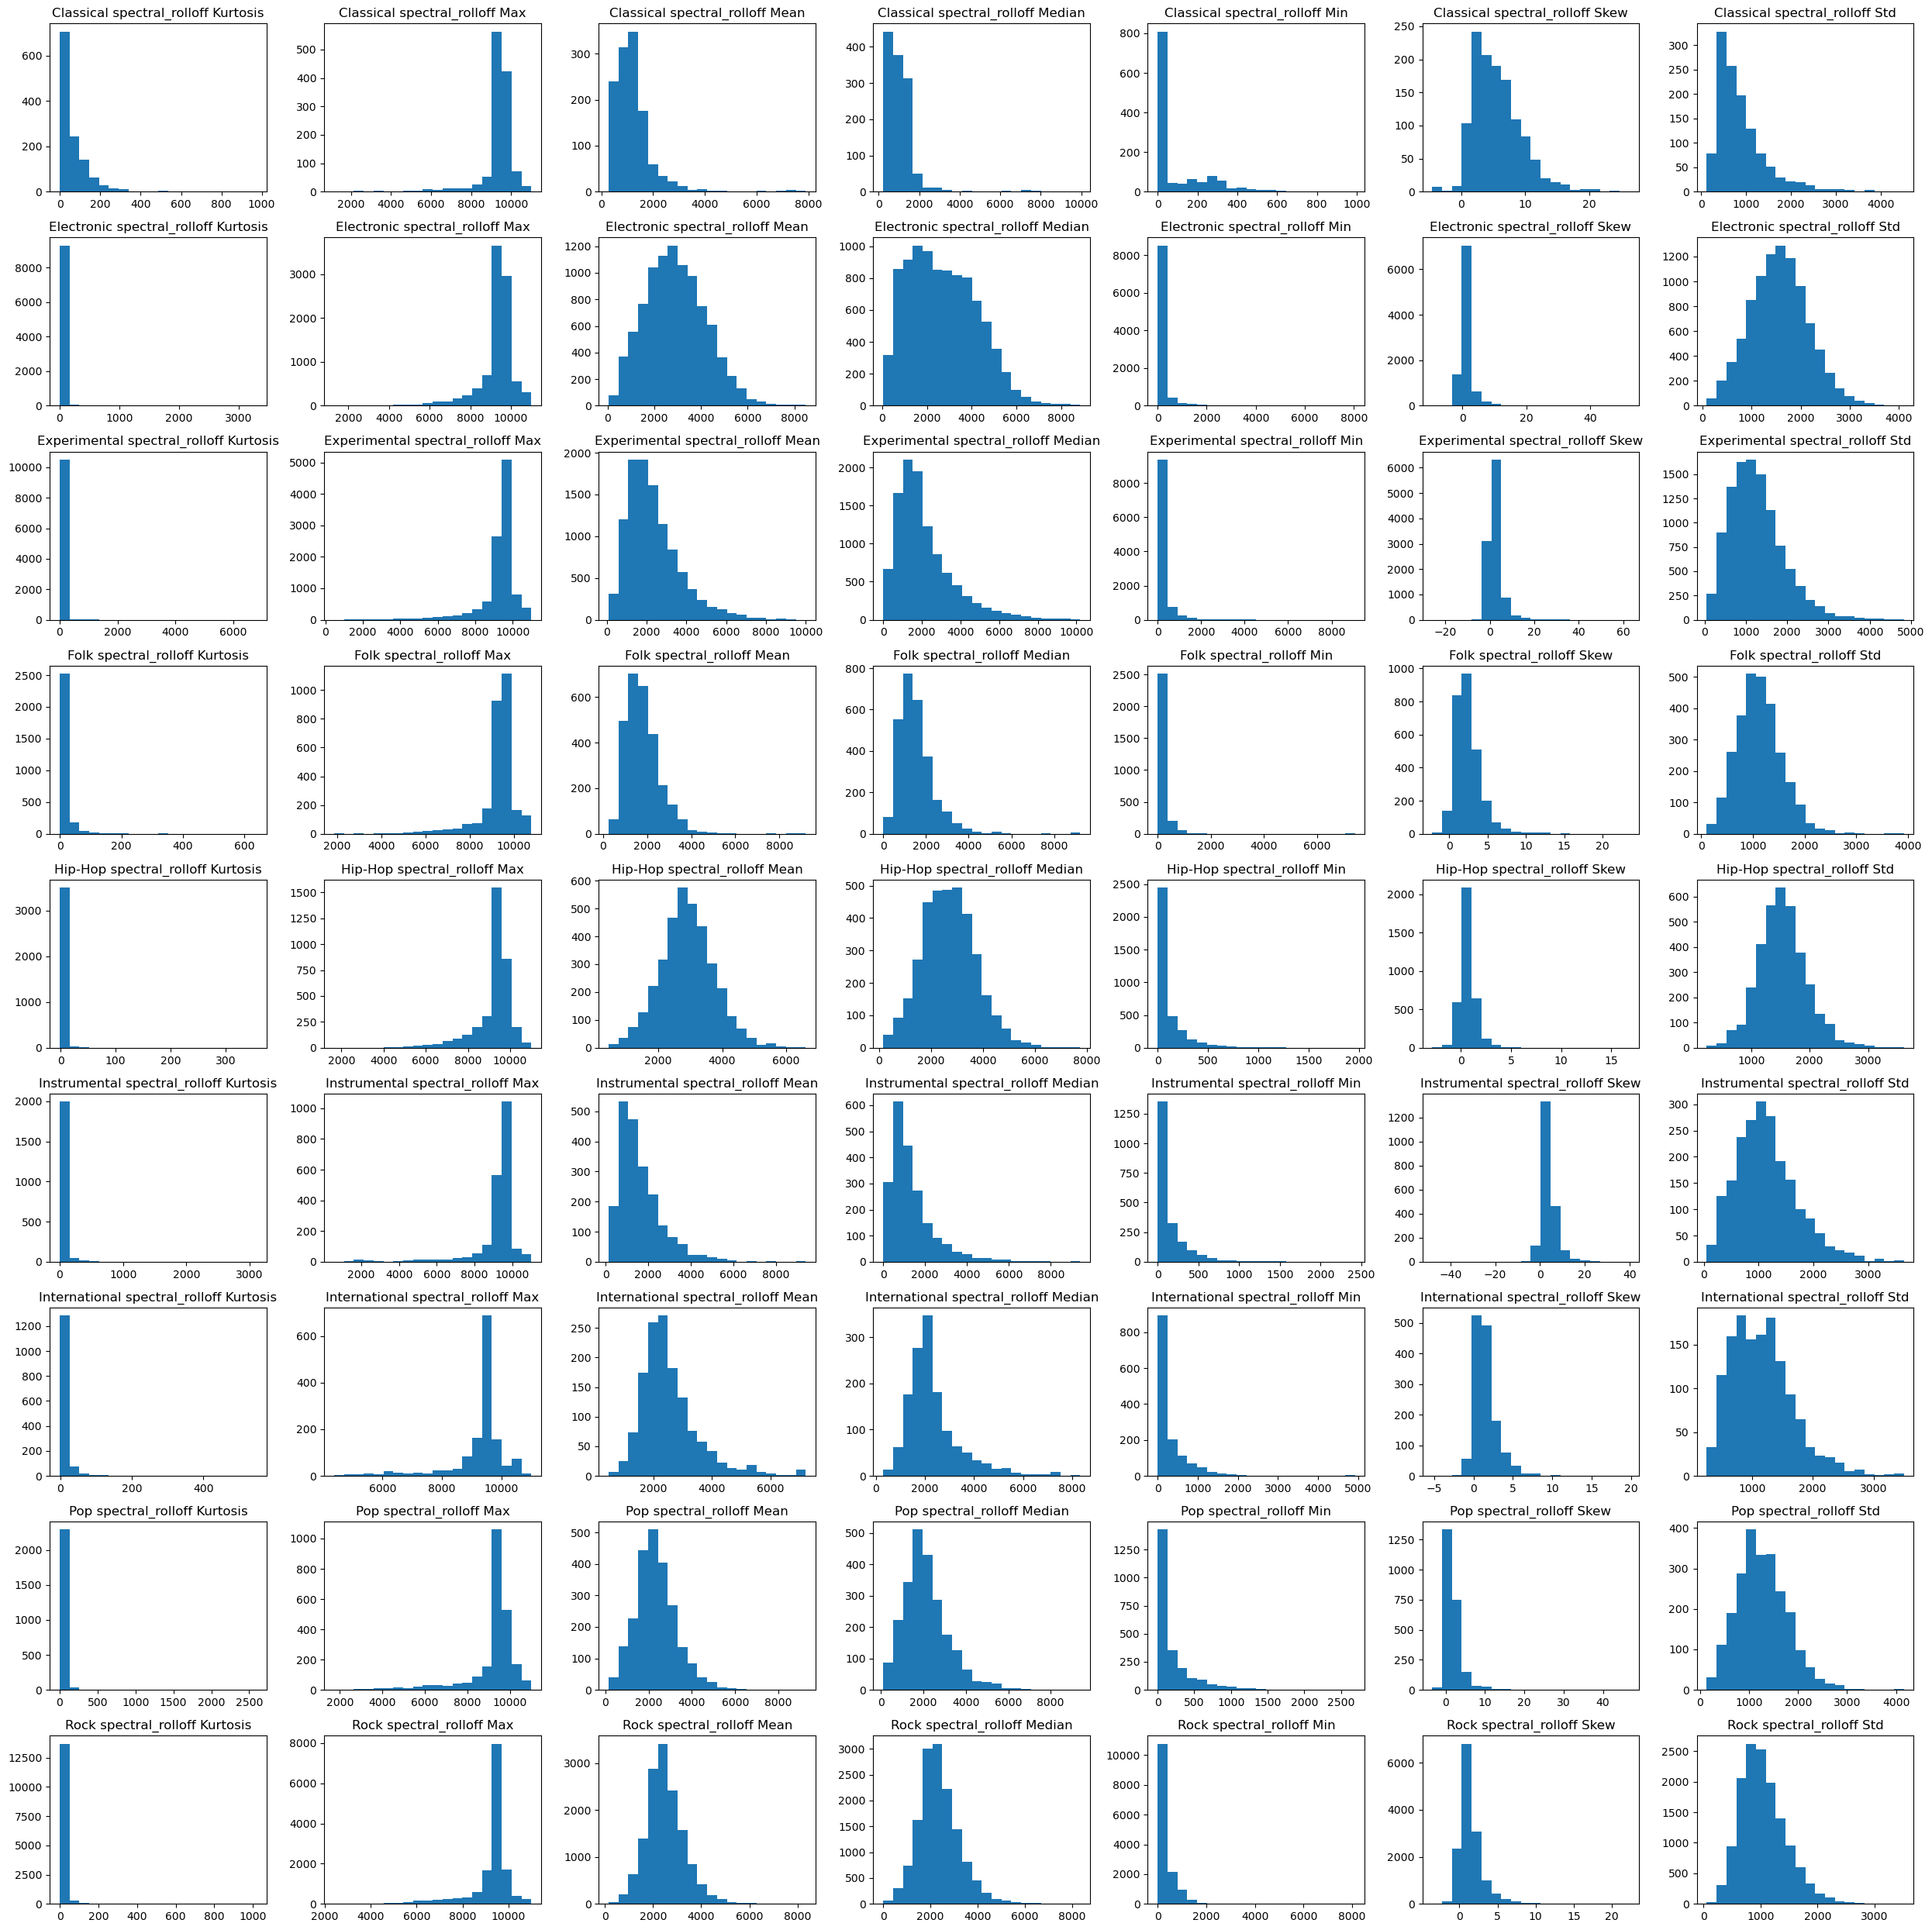

In [172]:
histogram_helper('spectral_rolloff')

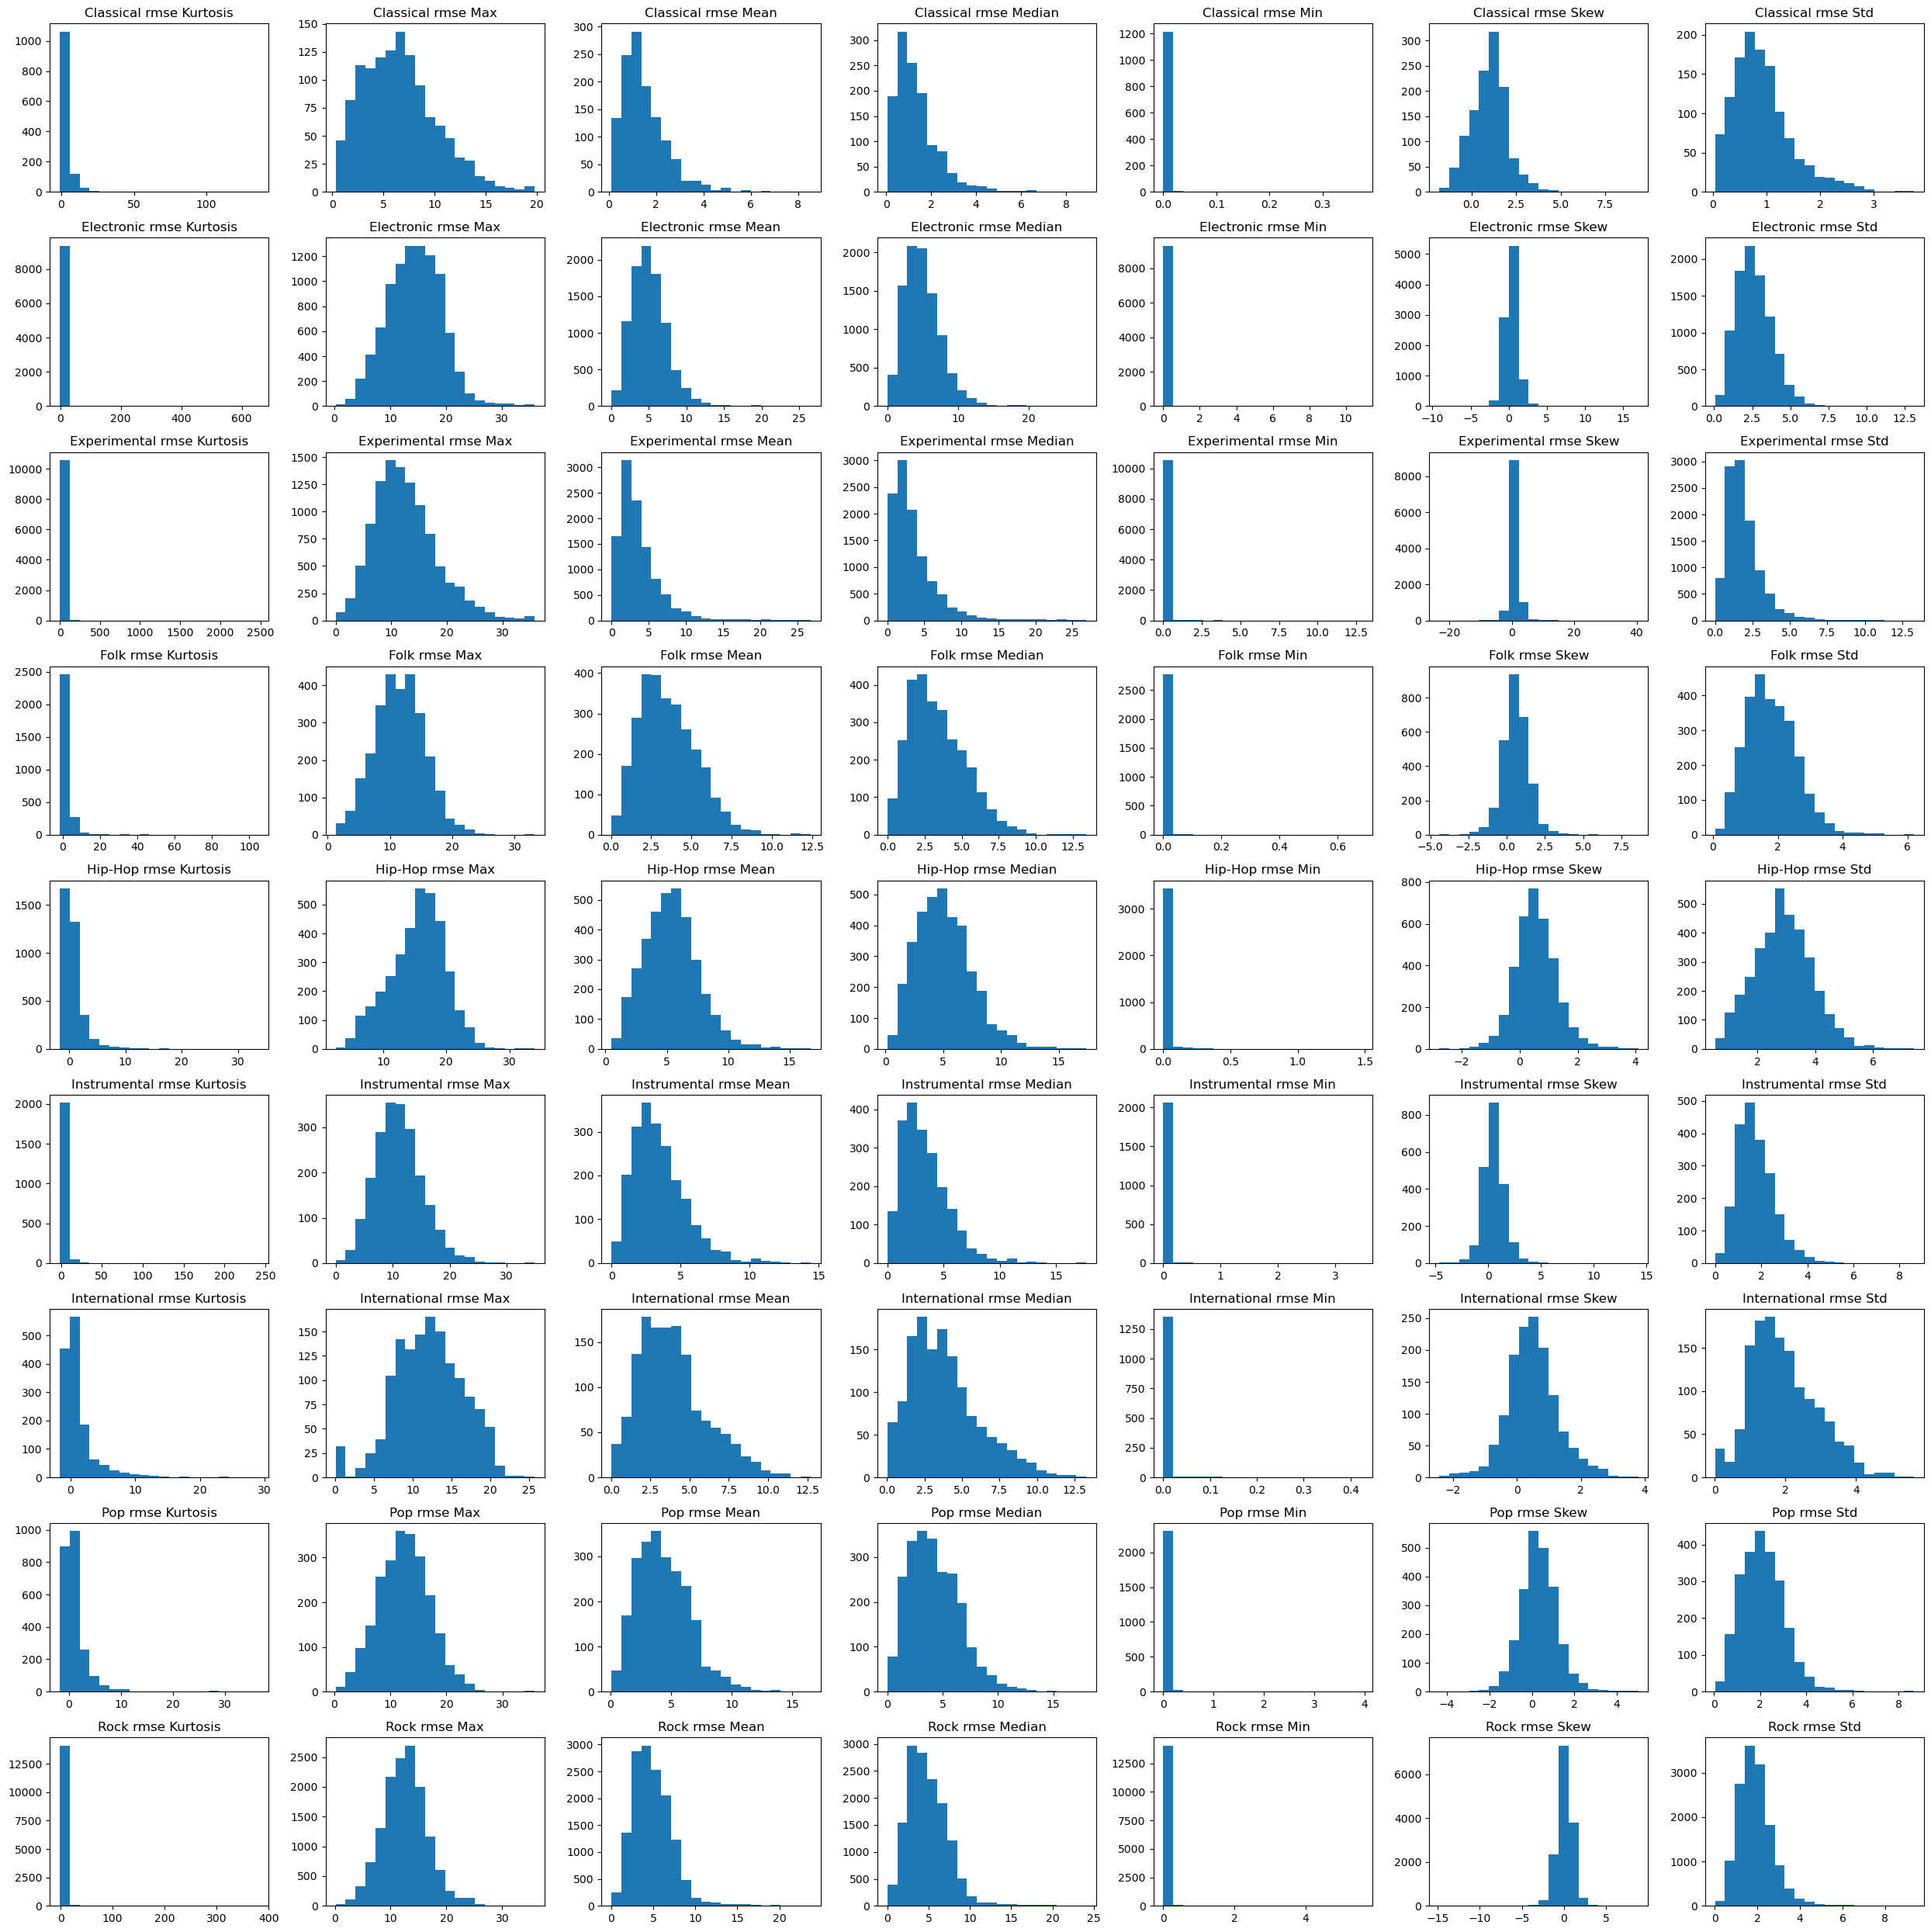

In [168]:
histogram_helper('rmse')

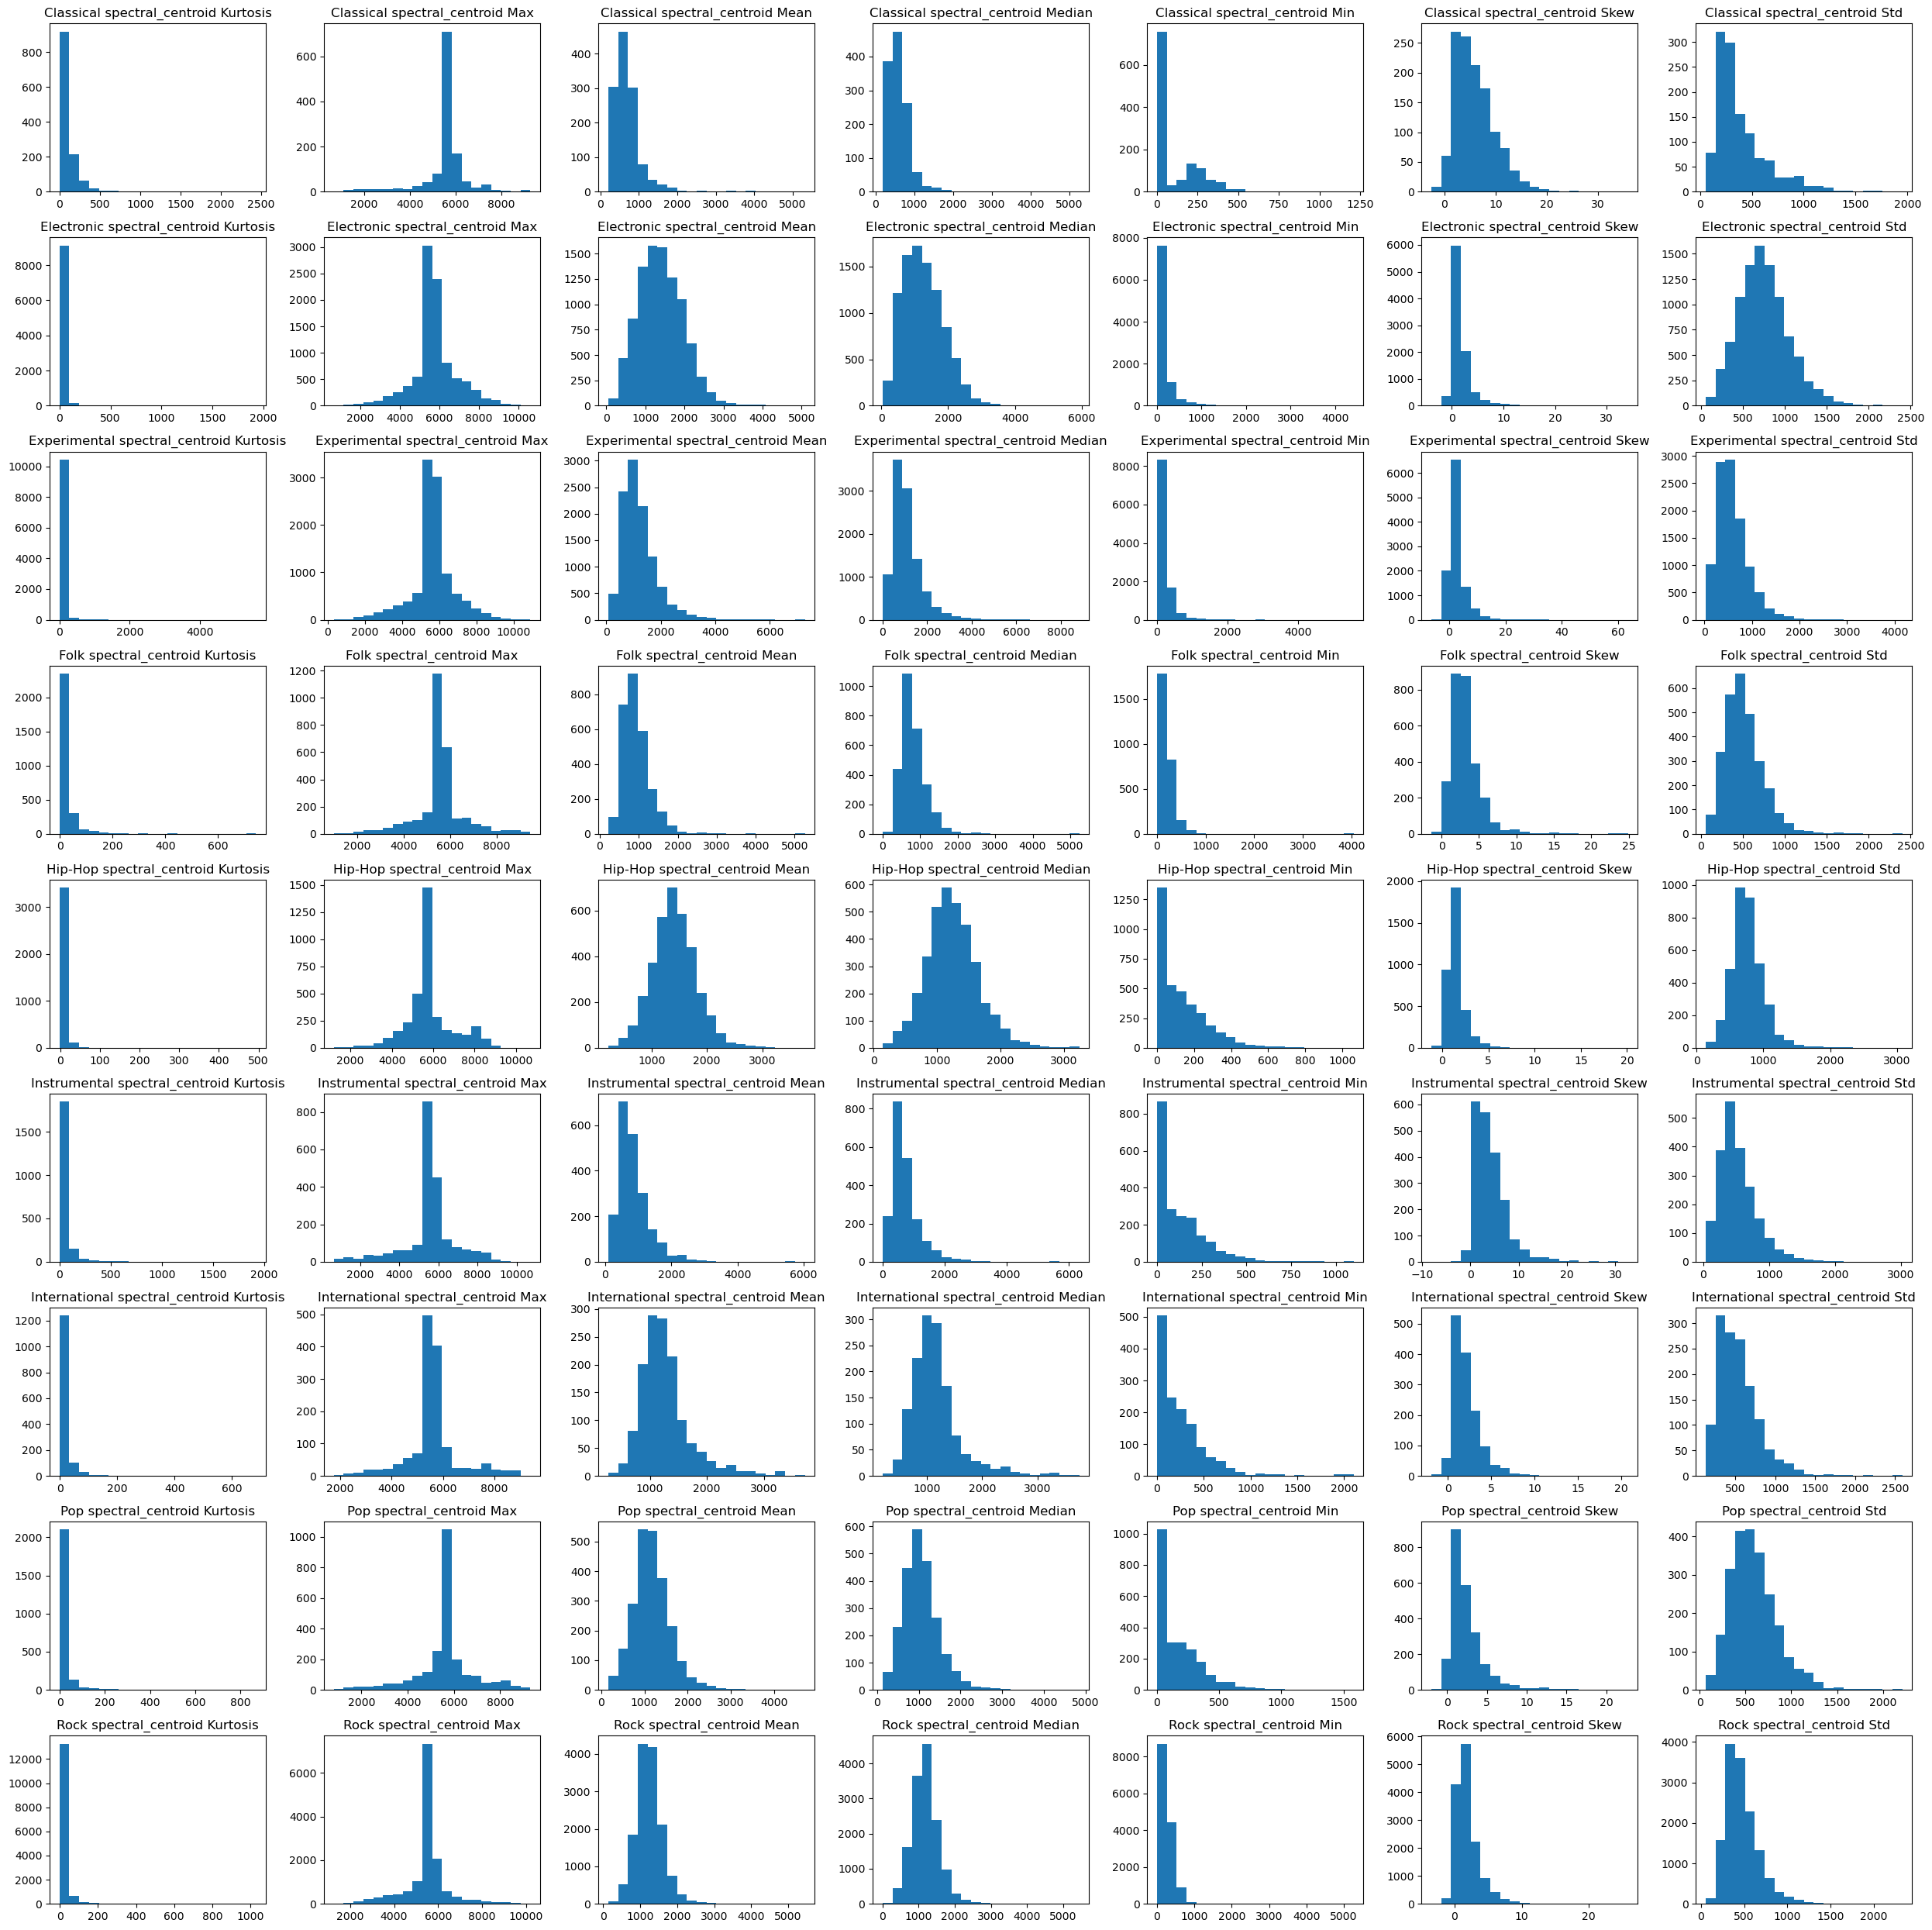

In [169]:
histogram_helper('spectral_centroid')

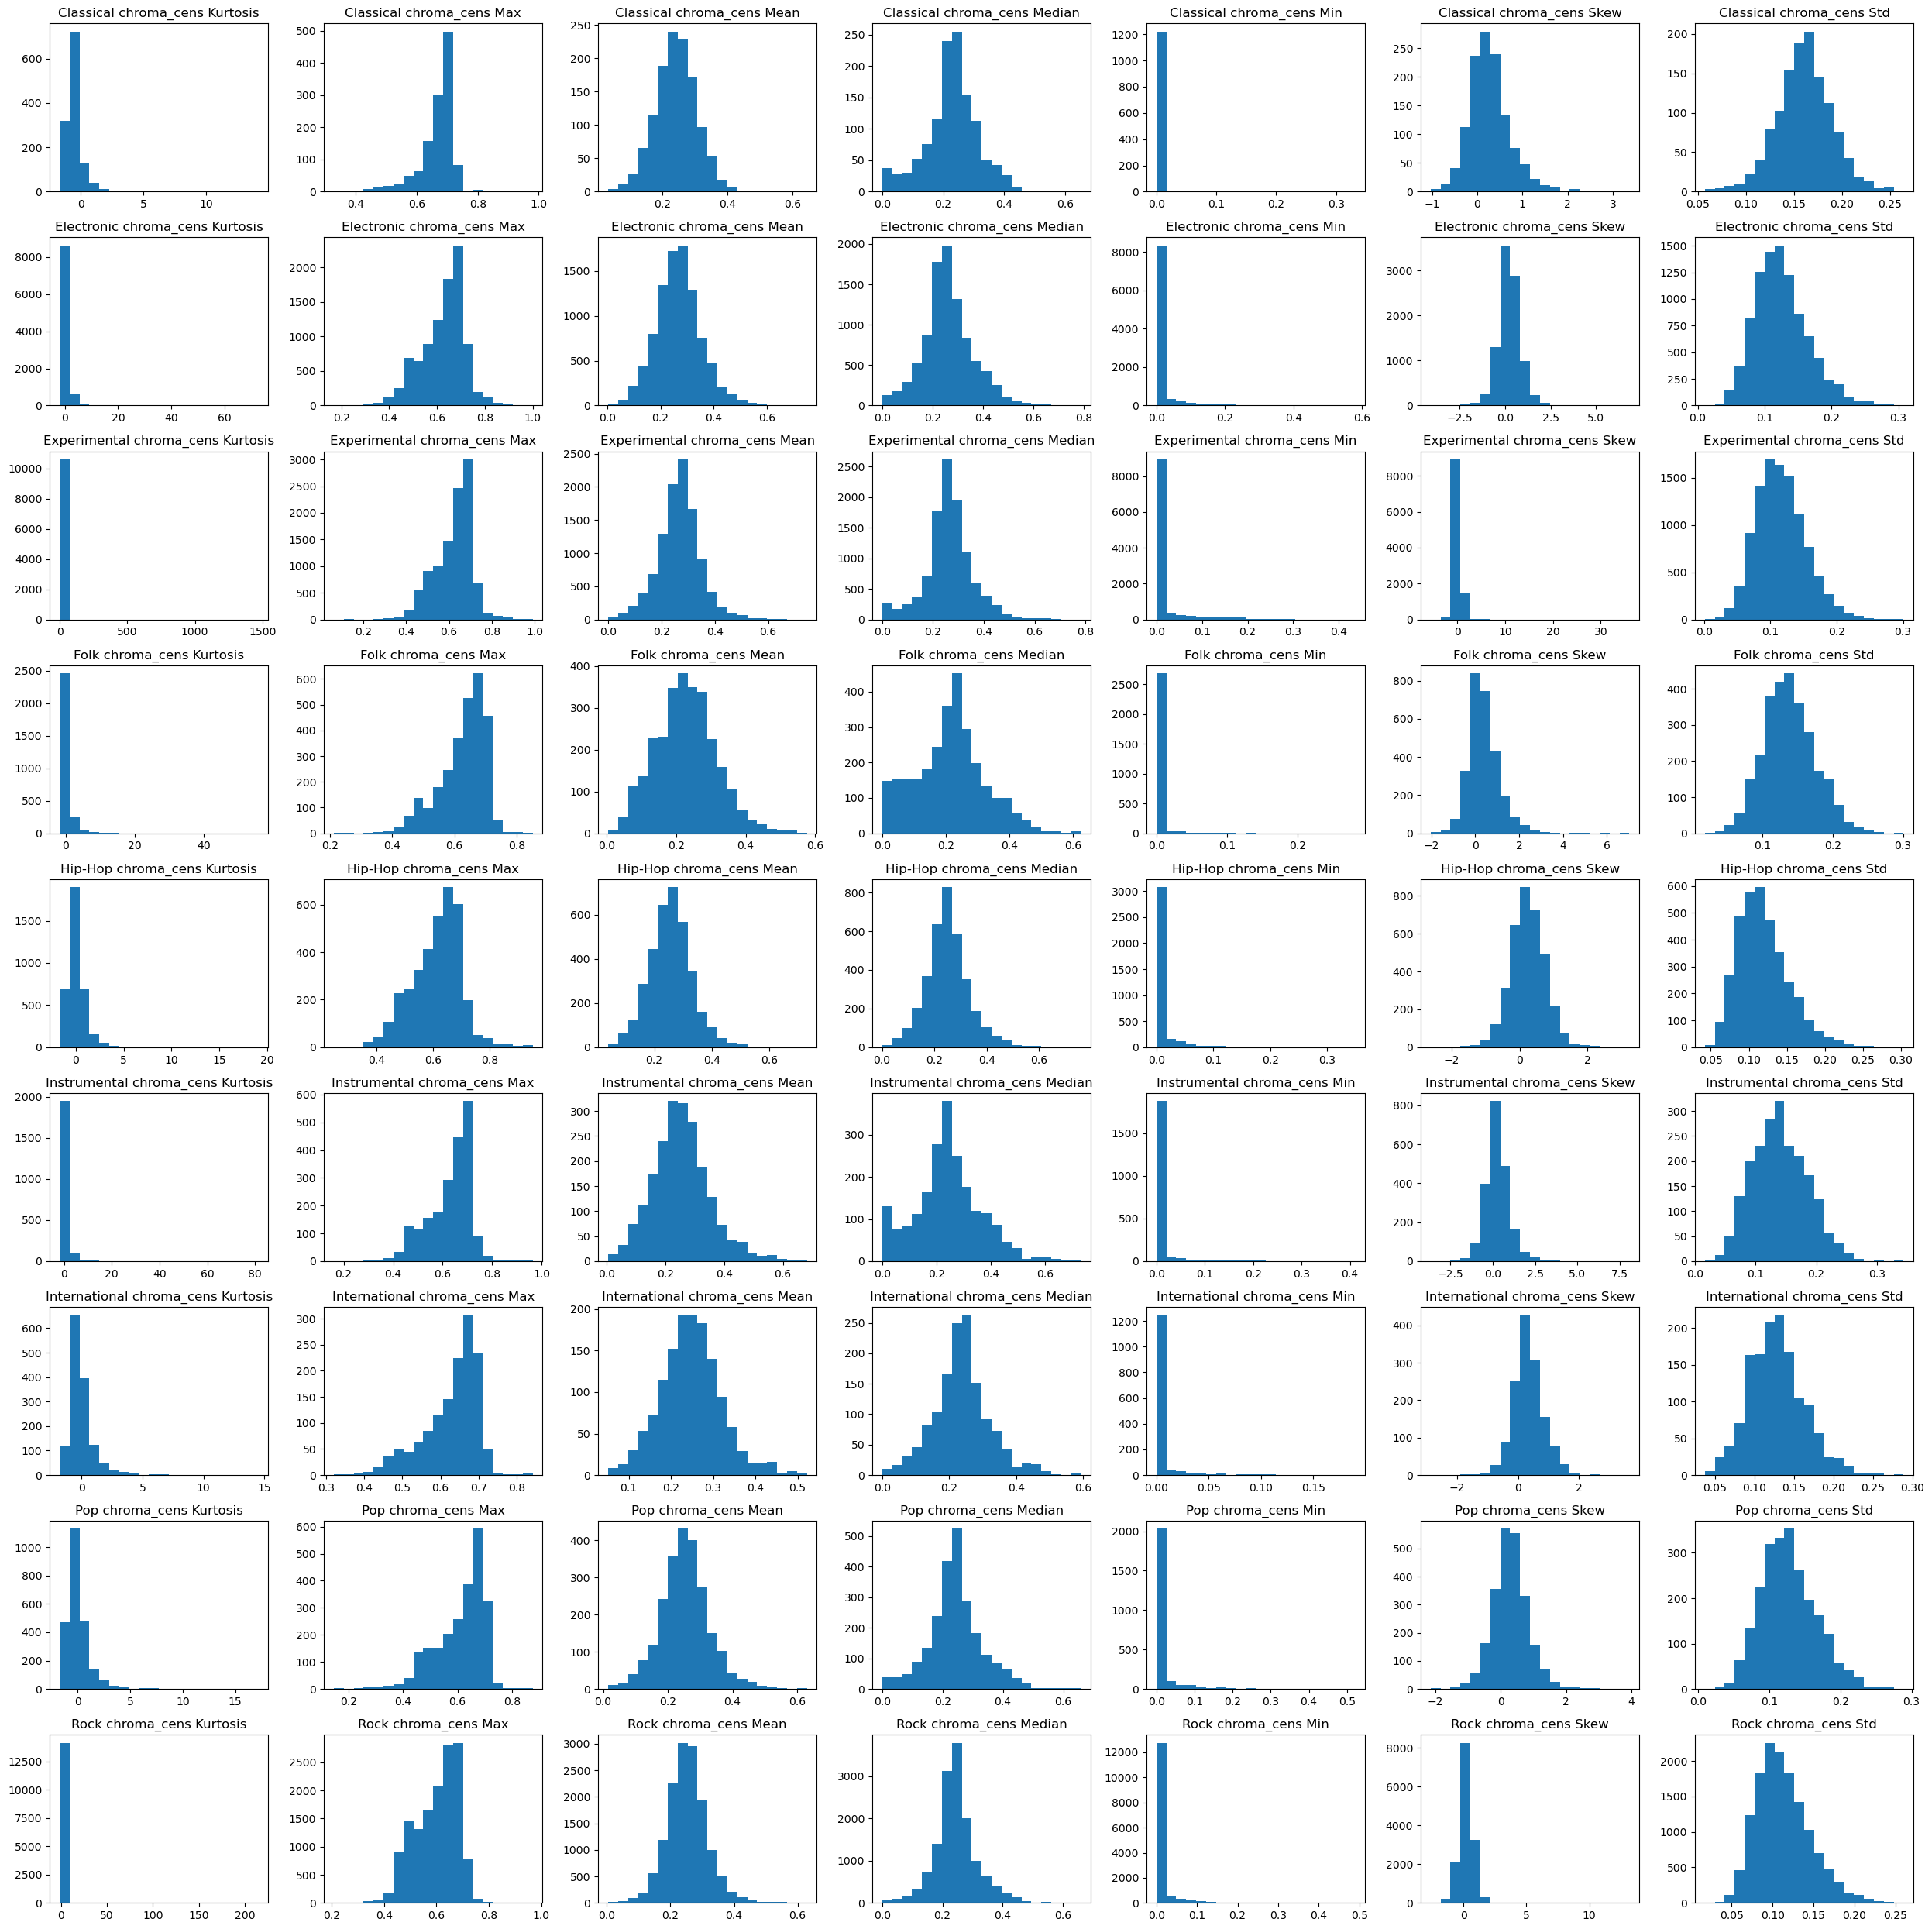

In [206]:
histogram_helper('chroma_cens')

I did not view the entirety of the features with the histogram helper as I used almost all the features. With that being said, a future next step for feature reduction to improve computational speed is to potentially remove the stastical measures with little genre to genre variance such as `min`. 

Additionally, I decided to remove two of the chroma features, leaving only chroma cens. I made this choice because they are all very related and chroma cens is the normalized version. I did this to simplify the feature space (by removing 160 features) and remove redundancy.

In [180]:
pd.set_option('display.max_columns', 500)

In [195]:
# Got rid of the two chroma features.

#locate the first 86 (chroma cens) and all features from 254-518 (all other features) , this removes chroma cqt and chroma stft
subset_model_df = filtered_model_df.iloc[:, list(range(86)) + list(range(254, len(filtered_model_df.columns)))]

subset_model_df.head()

,genre_top,chroma_cens_kurtosis_1,chroma_cens_kurtosis_2,chroma_cens_kurtosis_3,chroma_cens_kurtosis_4,chroma_cens_kurtosis_5,chroma_cens_kurtosis_6,chroma_cens_kurtosis_7,chroma_cens_kurtosis_8,chroma_cens_kurtosis_9,chroma_cens_kurtosis_10,chroma_cens_kurtosis_11,chroma_cens_kurtosis_12,chroma_cens_max_1,chroma_cens_max_2,chroma_cens_max_3,chroma_cens_max_4,chroma_cens_max_5,chroma_cens_max_6,chroma_cens_max_7,chroma_cens_max_8,chroma_cens_max_9,chroma_cens_max_10,chroma_cens_max_11,chroma_cens_max_12,chroma_cens_mean_1,chroma_cens_mean_2,chroma_cens_mean_3,chroma_cens_mean_4,chroma_cens_mean_5,chroma_cens_mean_6,chroma_cens_mean_7,chroma_cens_mean_8,chroma_cens_mean_9,chroma_cens_mean_10,chroma_cens_mean_11,chroma_cens_mean_12,chroma_cens_median_1,chroma_cens_median_2,chroma_cens_median_3,chroma_cens_median_4,chroma_cens_median_5,chroma_cens_median_6,chroma_cens_median_7,chroma_cens_median_8,chroma_cens_median_9,chroma_cens_median_10,chroma_cens_median_11,chroma_cens_median_12,chroma_cens_min_1,chroma_cens_min_2,chroma_cens_min_3,chroma_cens_min_4,chroma_cens_min_5,chroma_cens_min_6,chroma_cens_min_7,chroma_cens_min_8,chroma_cens_min_9,chroma_cens_min_10,chroma_cens_min_11,chroma_cens_min_12,chroma_cens_skew_1,chroma_cens_skew_2,chroma_cens_skew_3,chroma_cens_skew_4,chroma_cens_skew_5,chroma_cens_skew_6,chroma_cens_skew_7,chroma_cens_skew_8,chroma_cens_skew_9,chroma_cens_skew_10,chroma_cens_skew_11,chroma_cens_skew_12,chroma_cens_std_1,chroma_cens_std_2,chroma_cens_std_3,chroma_cens_std_4,chroma_cens_std_5,chroma_cens_std_6,chroma_cens_std_7,chroma_cens_std_8,chroma_cens_std_9,chroma_cens_std_10,chroma_cens_std_11,chroma_cens_std_12,chroma_cqt_kurtosis_1,mfcc_kurtosis_2,mfcc_kurtosis_3,mfcc_kurtosis_4,mfcc_kurtosis_5,mfcc_kurtosis_6,mfcc_kurtosis_7,mfcc_kurtosis_8,mfcc_kurtosis_9,mfcc_kurtosis_10,mfcc_kurtosis_11,mfcc_kurtosis_12,mfcc_kurtosis_13,mfcc_kurtosis_14,mfcc_kurtosis_15,mfcc_kurtosis_16,mfcc_kurtosis_17,mfcc_kurtosis_18,mfcc_kurtosis_19,mfcc_kurtosis_20,mfcc_max_1,mfcc_max_2,mfcc_max_3,mfcc_max_4,mfcc_max_5,mfcc_max_6,mfcc_max_7,mfcc_max_8,mfcc_max_9,mfcc_max_10,mfcc_max_11,mfcc_max_12,mfcc_max_13,mfcc_max_14,mfcc_max_15,mfcc_max_16,mfcc_max_17,mfcc_max_18,mfcc_max_19,mfcc_max_20,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,mfcc_mean_7,mfcc_mean_8,mfcc_mean_9,mfcc_mean_10,mfcc_mean_11,mfcc_mean_12,mfcc_mean_13,mfcc_mean_14,mfcc_mean_15,mfcc_mean_16,mfcc_mean_17,mfcc_mean_18,mfcc_mean_19,mfcc_mean_20,mfcc_median_1,mfcc_median_2,mfcc_median_3,mfcc_median_4,mfcc_median_5,mfcc_median_6,mfcc_median_7,mfcc_median_8,mfcc_median_9,mfcc_median_10,mfcc_median_11,mfcc_median_12,mfcc_median_13,mfcc_median_14,mfcc_median_15,mfcc_median_16,mfcc_median_17,mfcc_median_18,mfcc_median_19,mfcc_median_20,mfcc_min_1,mfcc_min_2,mfcc_min_3,mfcc_min_4,mfcc_min_5,mfcc_min_6,mfcc_min_7,mfcc_min_8,mfcc_min_9,mfcc_min_10,mfcc_min_11,mfcc_min_12,mfcc_min_13,mfcc_min_14,mfcc_min_15,mfcc_min_16,mfcc_min_17,mfcc_min_18,mfcc_min_19,mfcc_min_20,mfcc_skew_1,mfcc_skew_2,mfcc_skew_3,mfcc_skew_4,mfcc_skew_5,mfcc_skew_6,mfcc_skew_7,mfcc_skew_8,mfcc_skew_9,mfcc_skew_10,mfcc_skew_11,mfcc_skew_12,mfcc_skew_13,mfcc_skew_14,mfcc_skew_15,mfcc_skew_16,mfcc_skew_17,mfcc_skew_18,mfcc_skew_19,mfcc_skew_20,mfcc_std_1,mfcc_std_2,mfcc_std_3,mfcc_std_4,mfcc_std_5,mfcc_std_6,mfcc_std_7,mfcc_std_8,mfcc_std_9,mfcc_std_10,mfcc_std_11,mfcc_std_12,mfcc_std_13,mfcc_std_14,mfcc_std_15,mfcc_std_16,mfcc_std_17,mfcc_std_18,mfcc_std_19,mfcc_std_20,rmse_kurtosis_1,rmse_max_1,rmse_mean_1,rmse_median_1,rmse_min_1,rmse_skew_1,rmse_std_1,spectral_bandwidth_kurtosis_1,spectral_bandwidth_max_1,spectral_bandwidth_mean_1,spectral_bandwidth_median_1,spectral_bandwidth_min_1,spectral_bandwidth_skew_1,spectral_bandwidth_std_1,spectral_centroid_kurtosis_1,spectral_centroid_max_1,spectral_centroid_mean_1,spectral_centroid_median_1,spectral_centroid_min_1,spectral_centroid_skew_1,spectral_centroid_std_1,spectral_contrast_kurtosis_1,spectral_contrast_kurtosis_2,spect

I have reduced the features from 518 to 351.

In [207]:
subset_model_df.shape

(47549, 351)

Saving the new dataframe for modeling.

In [196]:
subset_model_df.to_csv('Data/subset_model_df.csv', index=False)

## TSNE

Here I am seperating out the dependent variables and the independent variable (genre) and scaling the dependent variables with standard scalar.

In [220]:
from sklearn.preprocessing import StandardScaler
X = subset_model_df.drop(columns='genre_top') #dep vars
y = subset_model_df['genre_top'] #y is only genre

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) #fit and transform to x_scaled



Below I am reducing the dimensionality of the features to 2-dimensional through TSNE.

In [221]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2) #reduce dimensionality to 2d
X_tsne = tsne.fit_transform(X_scaled)

C:\Users\oconn\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\oconn\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



Label encoding the y to convert the genres from strings to encoded numbers.

In [222]:
from sklearn.preprocessing import LabelEncoder

# Encoder object
label_encoder = LabelEncoder()

# Fit the encoder on y
label_encoder.fit(y)

# Transform
y_encoded = label_encoder.transform(y)

Shown below is a 2-D visualization of the dataset, color-coordinated by genre. It is clearly not perfectly grouped, but some genres seem to be located close to each other, such as rock and folk. Unsurprisingly, some of the more ambiguous genres, such as experimental and international, are more spread out. Those categories could have some cultural or locational criteria linked to their genre as opposed to purely acoustically.

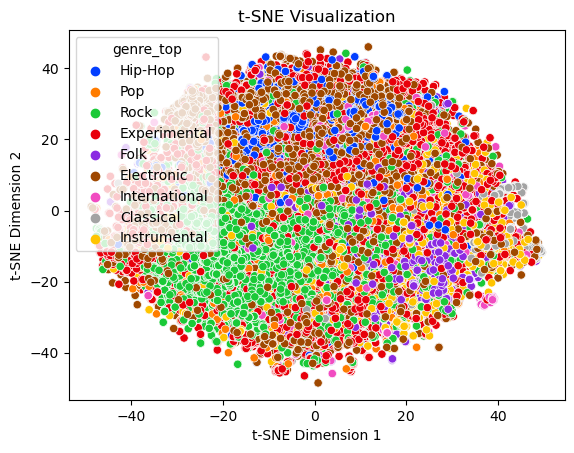

In [223]:
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='bright')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization')
plt.savefig('tsne_plot.png')
plt.show()